In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Online_Retail.xlsx')

In [35]:
df['CustomerID'] = df['CustomerID'].astype('Int64')
df_copy = df.copy()
df_copy = df.set_index('InvoiceDate')
df_copy['CustomerID'] = df_copy['CustomerID'].fillna(1)
df_copy['Description'] = df_copy['Description'].fillna('Unknown')

In [5]:
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom


In [7]:
df_copy.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

In [9]:
df_copy.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## some graphs

In [44]:
from scipy.stats.mstats import winsorize

df_copy = df_copy[df_copy['UnitPrice'] >= 0]
# Winsorize the 'UnitPrice' and 'Quantity' columns
df_copy['UnitPrice_winsor'] = winsorize(df_copy['UnitPrice'], limits=[0.02, 0.10])
df_copy['Quantity_winsor'] = winsorize(df_copy['Quantity'], limits=[0.01, 0.10])

# Apply log transformation
df_copy['Log_UnitPrice'] = np.log1p(df_copy['UnitPrice'])
df_copy['Log_Quantity'] = np.log1p(df_copy['Quantity'])

c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Gabriel\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


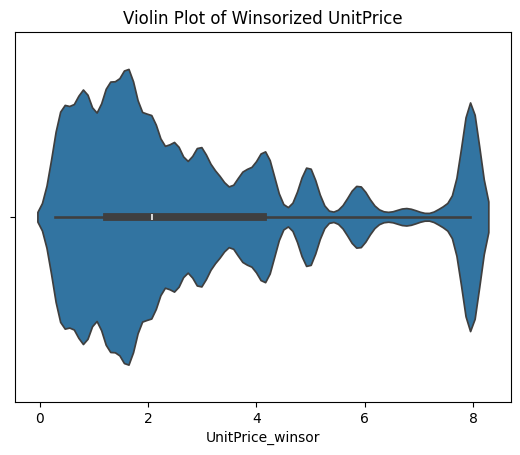

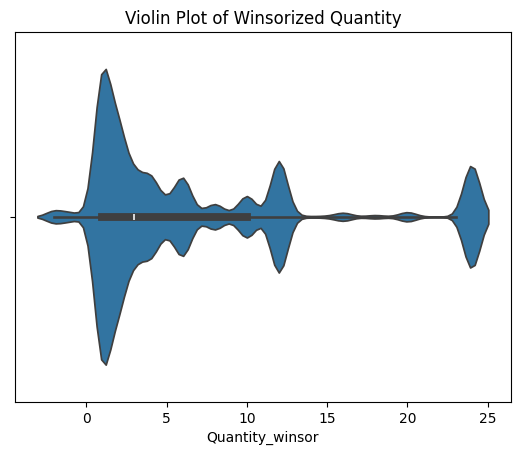

In [45]:
# Violin plot for UnitPrice
sns.violinplot(x=df_copy['UnitPrice_winsor'])
plt.title("Violin Plot of Winsorized UnitPrice")
plt.show()

# Violin plot for Quantity
sns.violinplot(x=df_copy['Quantity_winsor'])
plt.title("Violin Plot of Winsorized Quantity")
plt.show()

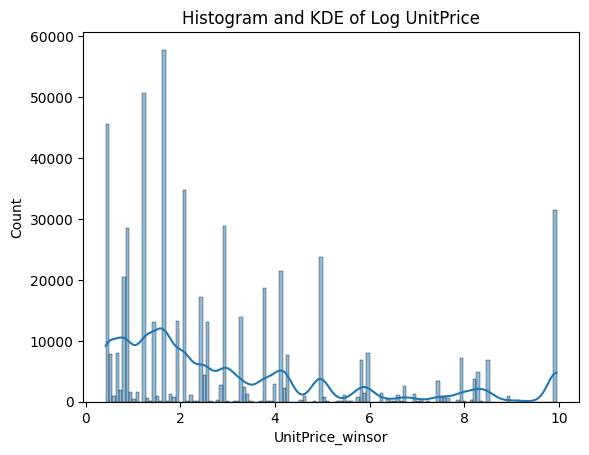

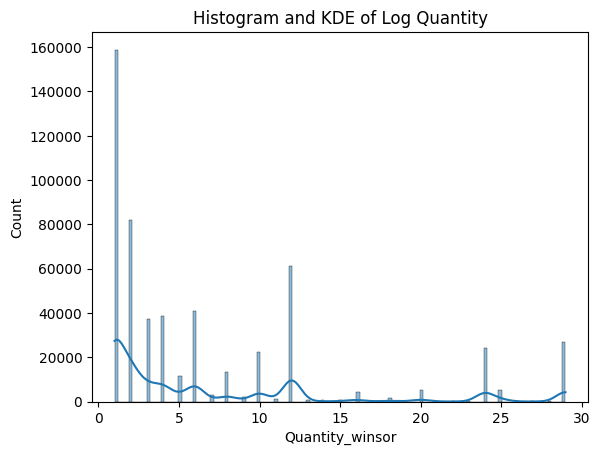

In [28]:
# Histogram for UnitPrice
sns.histplot(df_copy['UnitPrice_winsor'], kde=True)
plt.title("Histogram and KDE of Log UnitPrice")
plt.show()

# Histogram for Quantity
sns.histplot(df_copy['Quantity_winsor'], kde=True)
plt.title("Histogram and KDE of Log Quantity")
plt.show()

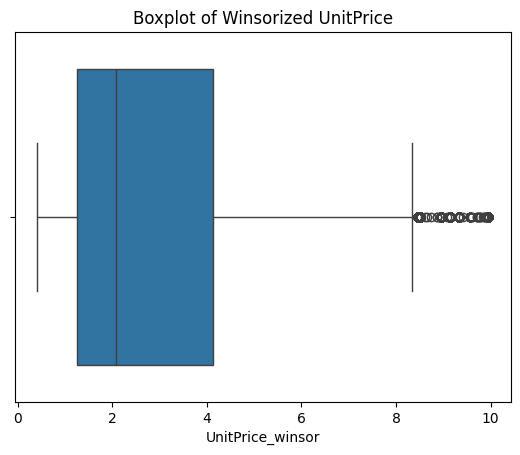

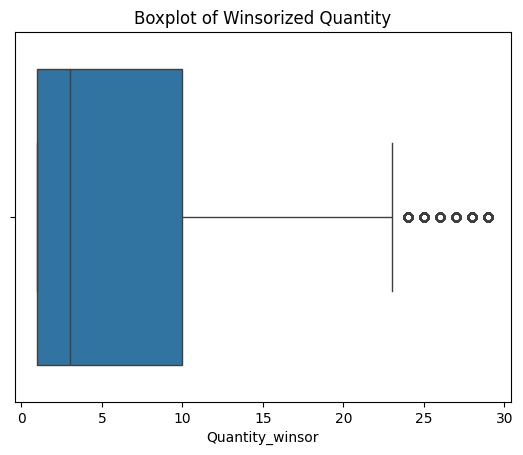

In [31]:
# Boxplot for UnitPrice without outliers
sns.boxplot(x=df_copy['UnitPrice_winsor'])
plt.title("Boxplot of Winsorized UnitPrice")
plt.show()

# Boxplot for Quantity without outliers
sns.boxplot(x=df_copy['Quantity_winsor'])
plt.title("Boxplot of Winsorized Quantity")
plt.show()

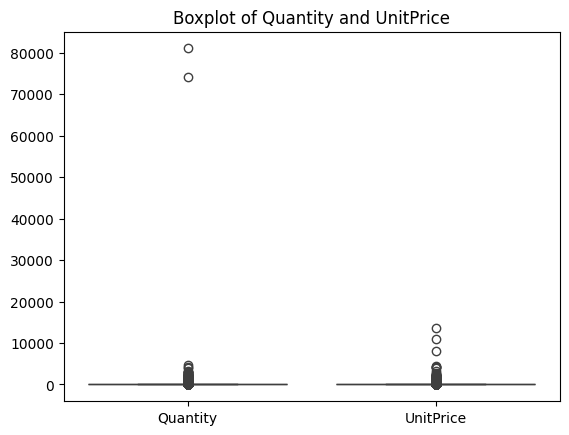

In [16]:
overzero = df_copy[(df_copy['UnitPrice'] > 0) & (df_copy['Quantity'] > 0)]
sns.boxplot(data=overzero[['Quantity', 'UnitPrice']])
plt.title('Boxplot of Quantity and UnitPrice')
plt.show()

## insights based of date

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12476\2669514707.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_copy['Quantity'].resample('M').sum().plot(marker='o')


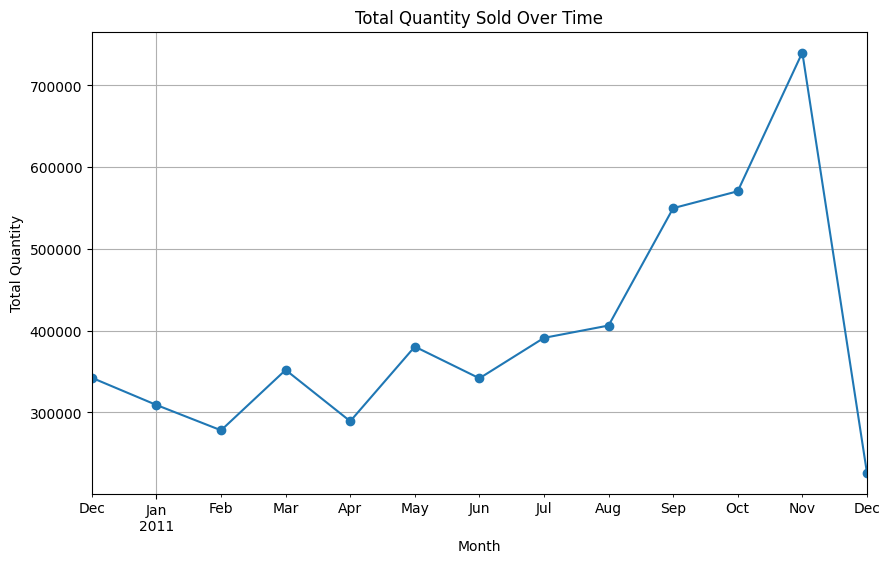

In [47]:

# Plot total quantity sold over time
plt.figure(figsize=(10, 6))
df_copy['Quantity'].resample('M').sum().plot(marker='o')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.grid(True)
plt.show()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12476\1237686135.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_copy['Revenue'].resample('M').sum().plot(marker='o', color='green')


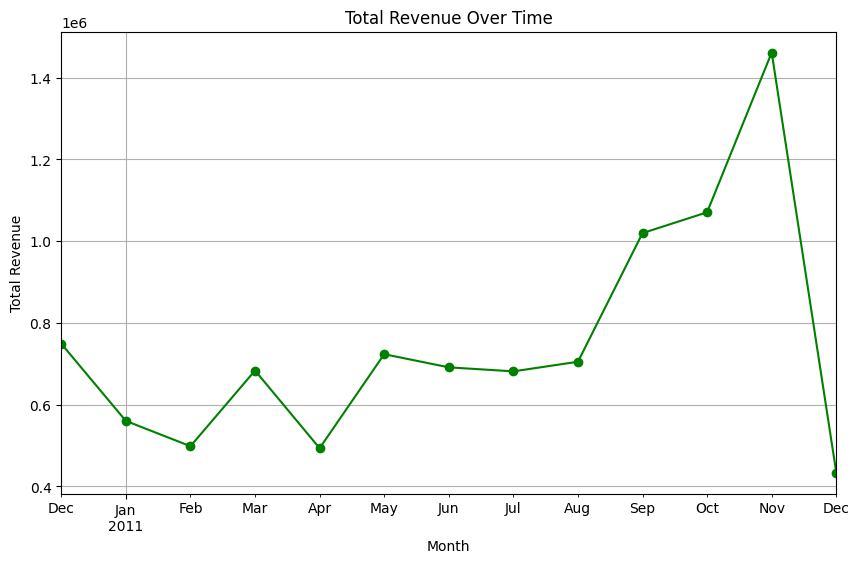

In [48]:
# Calculate total revenue
df_copy['Revenue'] = df_copy['Quantity'] * df_copy['UnitPrice']

# Plot total revenue over time
plt.figure(figsize=(10, 6))
df_copy['Revenue'].resample('M').sum().plot(marker='o', color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

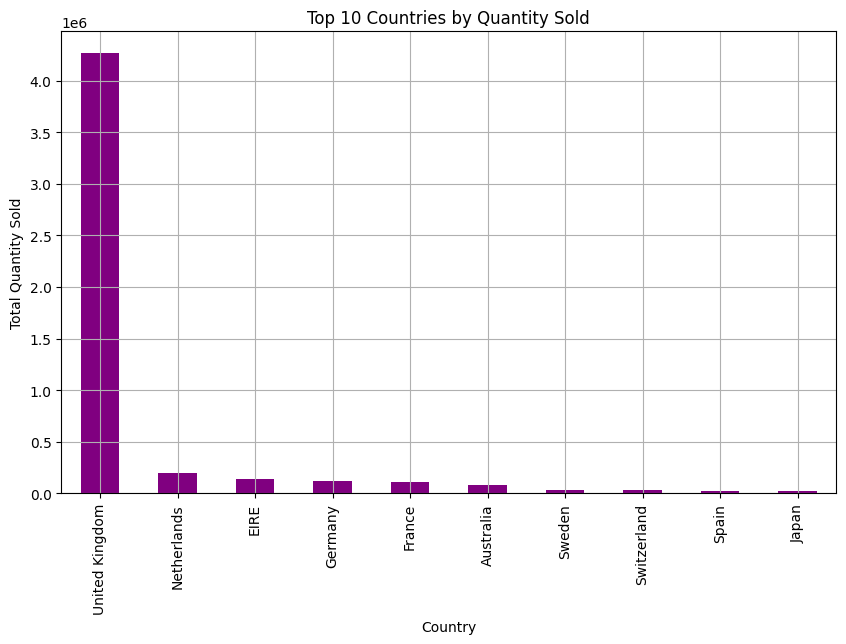

In [49]:
# Group by country and sum quantities
top_countries = df_copy.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top countries by quantity sold
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()


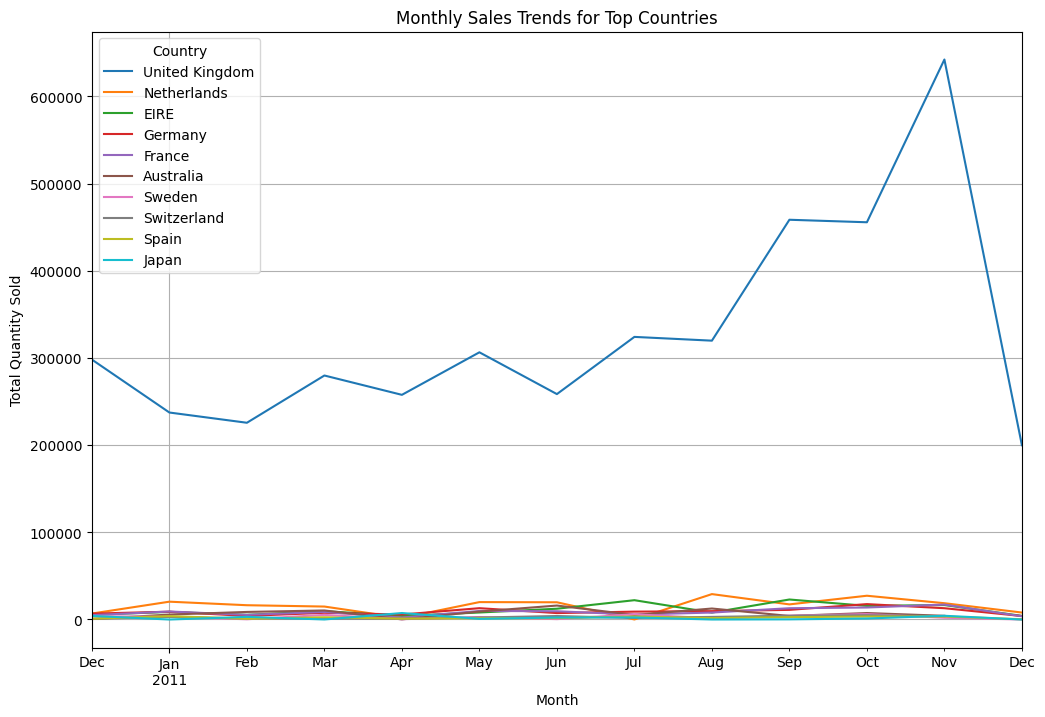

In [51]:
# Resample data by month and country
monthly_country_data = df_copy.groupby(['Country', df_copy.index.to_period('M')])['Quantity'].sum().unstack()

# Filter for the top countries
top_countries_list = top_countries.index

# Plot monthly sales trends for top countries
plt.figure(figsize=(12, 8))
for country in top_countries_list:
    if country in monthly_country_data.index:
        monthly_country_data.loc[country].plot(label=country)

plt.title('Monthly Sales Trends for Top Countries')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Country')
plt.grid(True)
plt.show()

